In [73]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)
file_location = 'data/Automobile.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Reading the formatted data
data = pd.read_csv(file_location, sep='#', decimal='.', header=None, names=[
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
    'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
    'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
    'highway-mpg', 'price'
])
# Displaying the first 10 values
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [74]:
# Lower all string values
data = data.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [75]:
# Trim all redundant whitespaces
data = data.apply(lambda x: x.str.strip() if(x.dtype == 'object') else x)

In [76]:
# List all of data types of the data frame
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [77]:
def check_if_column_has_nan_value(df, column):
    """ Check if a column has any NaN Value
    @:param: df - target dataframe
    @:param: column-  target column
    @:return: True if column has NaN value(s). False if otherwise"""
    if df[column].isna().any():
        return True
    else:
        return False

In [78]:
def check_boundaries(df, column, lower_bound, upper_bound):
    """ Check if a column has any oob value
    @:param: df - target dataframe
    @:param: column -  target column
    @:param: lower_bound - lower bound
    @:param: upper_bound - upper bound
    @:return: True if column has oob value(s). False if otherwise"""
    if upper_bound is not None:
        if df[column].min() < lower_bound or df[column].max() > upper_bound:
            return True
        else:
            return False
    else:
        if df[column].min() < lower_bound:
            return True
        else:
            return False

In [79]:
def list_unique_values_in_a_column(df, column):
    """ List all unique values in a given column
    @:param: df - target dataframe
    @:param: column -  target column
    @:return: A list of unique values in the given column"""
    return df[column].unique().tolist()

In [80]:
def show_min_max_value(df, column):
    """ Displaying min and max values of a given column
    @:param: df - target dataframe
    @:param: column -  target column
    @:return: A string with min max values"""
    return "Min: {}. Max: {}".format(df[column].min(), df[column].max())

In [81]:
def fix_typo(df, column, typo, correct_word):
    """ Replace typo with the correct word
    @:param: df - target dataframe
    @:param: column -  target column
    @:param: typo - target typo
    @:param: correct_word - replacement for the typo
    @:return: None"""
    mask = df[column] == typo
    df.loc[mask, column] = correct_word

In [82]:
def replace_oob_values(df, column, oob_value, value, sign):
    """ Replace oob values
    @:param: df - target dataframe
    @:param: column -  target column
    @:param: oob_value - target value for replacement
    @:param: value - replacement value
    @:param: sign - indicate target boundary
    @:return: None"""
    if sign == '>':
        mask = df[column] > oob_value
        df.loc[mask, column] = value
    elif sign == '<':
        mask = df[column] < oob_value
        df.loc[mask, column] = value

In [83]:
def list_nan_values_in_column(df, column):
    """ List all NaN values in the column
    @:param: df - target dataframe
    @:param: column -  target column
    @:return: A list of NaN values in the given column"""
    return df.loc[data[column].isna()]

In [84]:
# Column: Symboling
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'symboling')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'symboling',-3, 3)))
print(show_min_max_value(data, 'symboling'))

NaN Value(s): False
Out-of-bound Value(s): True
Min: -2. Max: 4


In [85]:
# Replace greater bound value with maximum value
replace_oob_values(data, 'symboling', 3, 3, '>')
# Replace lesser bound value with minimum value
replace_oob_values(data, 'symboling', -3, -3, '<')
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'symboling')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'symboling',-3, 3)))
print(show_min_max_value(data, 'symboling'))

NaN Value(s): False
Out-of-bound Value(s): Found 0.0 value(s)
Min: -2. Max: 3


In [86]:
# List all unique values in the make column to find typos
list_unique_values_in_a_column(data, 'make')
# typo = vol00112ov

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 'vol00112ov']

In [87]:
# Replace typo in make column
fix_typo(data, 'make', 'vol00112ov', 'volvo')
list_unique_values_in_a_column(data, 'make')

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [88]:
# List all unique values in the symboling column to find out-of-bound values
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'normalized-losses')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'normalized-losses',0, None)))
print(show_min_max_value(data, 'normalized-losses'))

NaN Value(s): True
Out-of-bound Value(s): False
Min: 25.0. Max: 256.0


In [89]:
# Replace NaN values with mean of normalized-losses group by make. if mean of group = 0, take the whole column avarage
data['normalized-losses'] = data['normalized-losses'].fillna(data.groupby('make')['normalized-losses'].transform('mean'))
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'normalized-losses')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'normalized-losses',0, None)))
print(show_min_max_value(data, 'normalized-losses'))

NaN Value(s): False
Out-of-bound Value(s): False
Min: 25.0. Max: 256.0


In [90]:
# List all unique values in the fuel type column to find typos
list_unique_values_in_a_column(data, 'fuel-type')
# No typo here

['gas', 'diesel']

In [91]:
# List all unique values in the aspiration column to find typos
list_unique_values_in_a_column(data, 'aspiration')
# typo found: turrrrbo

['std', 'turbo', 'turrrrbo']

In [92]:
# Replace typo
fix_typo(data, 'aspiration', 'turrrrbo', 'turbo')
list_unique_values_in_a_column(data, 'aspiration')

['std', 'turbo']

In [93]:
# List all unique values in the aspiration column to find typos and NaN
list_unique_values_in_a_column(data, 'num-of-doors')
# typo found: fourr
# NaN found

['two', 'four', nan, 'fourr']

In [94]:
# Replace typo
fix_typo(data, 'num-of-doors', 'fourr', 'four')
list_unique_values_in_a_column(data, 'num-of-doors')

['two', 'four', nan]

In [95]:
#View all NaN value in this column
list_nan_values_in_column(data, 'num-of-doors')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.000000,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,123.933333,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [96]:
data['num-of-doors'] = data['num-of-doors'].fillna('four')
# if body-style == sedan or wagon, most likely a 4-door car
list_unique_values_in_a_column(data, 'num-of-doors')

['two', 'four']

In [97]:
list_unique_values_in_a_column(data, 'body-style')
# No NaN values, or typos

['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']

In [98]:
list_unique_values_in_a_column(data, 'drive-wheels')
# No NaN values, or typos

['rwd', 'fwd', '4wd']

In [99]:
list_unique_values_in_a_column(data, 'engine-location')
# No NaN values, or typos

['front', 'rear']

In [100]:
# Column: wheel-base
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'wheel-base')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'wheel-base',0, None)))
print(show_min_max_value(data, 'wheel-base'))

NaN Value(s): False
Out-of-bound Value(s): False
Min: 86.6. Max: 120.9
NaN Value(s): False
Out-of-bound Value(s): False
Min: 86.6. Max: 120.9


In [101]:
# Column: length
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'length')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'length',0, None)))
print(show_min_max_value(data, 'length'))

NaN Value(s): False
Out-of-bound Value(s): False
Min: 141.1. Max: 208.1


In [102]:
# Column: width
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'width')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'width',0, None)))
print(show_min_max_value(data, 'width'))

NaN Value(s): False
Out-of-bound Value(s): False
Min: 60.3. Max: 72.3


In [103]:
# Column: height
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'height')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'height',0, None)))
print(show_min_max_value(data, 'height'))

NaN Value(s): False
Out-of-bound Value(s): False


In [104]:
# Column: height
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'curb-weight')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'curb-weight',0, None)))
print(show_min_max_value(data, 'height'))
# No NaN or out-of-bound values

NaN Value(s): False
Out-of-bound Value(s): False


In [105]:
list_unique_values_in_a_column(data, 'engine-type')
# No Typos found

['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']

In [106]:
list_unique_values_in_a_column(data, 'num-of-cylinders')
# No NaN or out-of-bound values

['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']

In [107]:
# Column: engine-size
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'engine-size')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'engine-size',0, None)))
print(show_min_max_value(data, 'engine-size'))

NaN Value(s): False
Out-of-bound Value(s): False


In [108]:
list_unique_values_in_a_column(data, 'fuel-system')
# No NaN or out-of-bound values

['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']

In [109]:
# Column: bore
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'bore')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'bore',0, None)))
print(show_min_max_value(data, 'bore'))

NaN Value(s): True
Out-of-bound Value(s): False


In [110]:
# Replacing NaN values with median value since the values in this column are relative close to each other.
data['bore'] = data['bore'].fillna(data['bore'].median())
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'bore')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'bore',0, None)))
print(show_min_max_value(data, 'bore'))

NaN Value(s): False
Out-of-bound Value(s): False


In [111]:
# Column: stroke
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'stroke')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'stroke',0, None)))
print(show_min_max_value(data, 'stroke'))

NaN Value(s): True
Out-of-bound Value(s): False


In [112]:
# Replacing NaN values with median value since the values in this column are relative close to each other.
data['stroke'] = data['stroke'].fillna(data['stroke'].median())
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'stroke')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'stroke',0, None)))
print(show_min_max_value(data, 'stroke'))

NaN Value(s): False
Out-of-bound Value(s): False


In [113]:
# Column: 'compression-ratio'
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'compression-ratio')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'compression-ratio',0, None)))
print(show_min_max_value(data, 'compression-ratio'))

NaN Value(s): False
Out-of-bound Value(s): False


In [114]:
# Column: 'horsepower'
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'horsepower')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'horsepower',0, None)))
print(show_min_max_value(data, 'horsepower'))

NaN Value(s): True
Out-of-bound Value(s): False


In [115]:
# Num of cylinders has a positive correlation with horsepower
# Replace NaN values with the average values calculate by grouping engine-type and num-of-cylinders
data['horsepower'] = data['horsepower'].fillna(data.groupby(['engine-type', 'num-of-cylinders'])['horsepower'].transform('mean'))
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'horsepower')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'horsepower',0, None)))
print(show_min_max_value(data, 'horsepower'))

NaN Value(s): False
Out-of-bound Value(s): False


In [116]:
# Column: 'peak-rpm'
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'peak-rpm')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'peak-rpm',0, None)))
print(show_min_max_value(data, 'peak-rpm'))

NaN Value(s): True
Out-of-bound Value(s): False


In [117]:
# Peak RPM depends on the fuel system
data['peak-rpm'] = data['peak-rpm'].fillna(data.groupby(['fuel-system'])['peak-rpm'].transform('mean'))
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'peak-rpm')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'peak-rpm',0, None)))
print(show_min_max_value(data, 'peak-rpm'))

NaN Value(s): False
Out-of-bound Value(s): False


In [118]:
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'city-mpg')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'city-mpg',0, None)))
print(show_min_max_value(data, 'city-mpg'))

NaN Value(s): False
Out-of-bound Value(s): False


In [119]:
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'highway-mpg')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'highway-mpg',0, None)))
print(show_min_max_value(data, 'highway-mpg'))

NaN Value(s): False
Out-of-bound Value(s): False


In [120]:
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'price')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'price', 0, None)))
print(show_min_max_value(data, 'price'))

NaN Value(s): True
Out-of-bound Value(s): Found 0.0 value(s)


In [121]:
# Replace NaN values with the make's average
data['price'] = data['price'].fillna(data.groupby('make')['price'].transform('mean'))
data['price'] = data['price'].fillna(data['price'].mean())
# Replace 0.0 with with NaN
data['price'] = data['price'].replace(0.0, np.nan)
# Replace Nan Values with make's average price
data['price'] = data['price'].fillna(data.groupby('make')['price'].transform('mean'))
data['price'] = data['price'].fillna(data['price'].mean())
print('NaN Value(s): {}'.format(check_if_column_has_nan_value(data, 'price')))
print('Out-of-bound Value(s): {}'.format(check_boundaries(data, 'price', 0, None)))
print(show_min_max_value(data, 'price'))

NaN Value(s): False
Out-of-bound Value(s): False


In [122]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values

#Code goes after this line
nominal_value = 'make'
ordinal_value = 'symboling'
numerical_value = 'price'

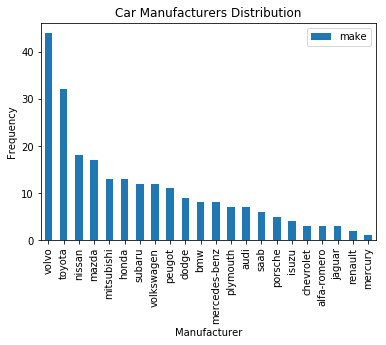

In [123]:
%matplotlib inline
# Graph for make
data['make'].value_counts().plot(kind='bar')
plt.title('Car Manufacturers Distribution')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('make.png', bbox_inches = 'tight')
plt.show()
plt.close()

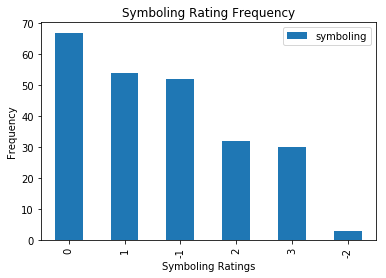

In [124]:
%matplotlib inline
# Graph for Symboling
data['symboling'].value_counts().plot(kind='bar')
plt.title('Symboling Rating Frequency')
plt.xlabel('Symboling Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('symboling.png', bbox_inches = 'tight')
plt.show()
plt.close()

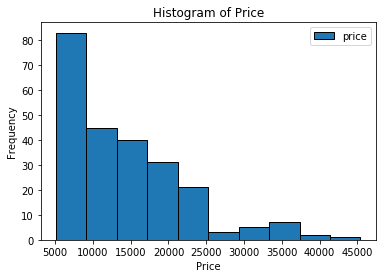

In [125]:
%matplotlib inline
# Graph for price
data['price'].plot(kind='hist', bins=10, edgecolor="k")
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('price.png', bbox_inches = 'tight')
plt.show()
plt.close()


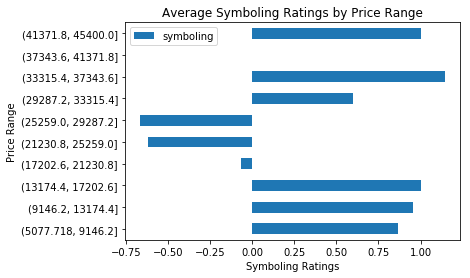

In [126]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis
%matplotlib inline
#Code goes after this line
# Split the price column into 10 categories and then calculate the mean of each categories. Finally, plot the results
data.groupby(pd.cut(data['price'], 10))['symboling'].mean().plot(kind='barh')
plt.title('Average Symboling Ratings by Price Range')
plt.xlabel('Symboling Ratings')
plt.ylabel('Price Range')
plt.legend(loc='best')
plt.savefig('priceNsymboling.png', bbox_inches = 'tight')
plt.show()
plt.close()

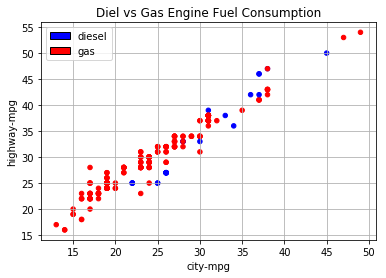

In [127]:
%matplotlib inline
# Color assignment
color_palette = {'gas': 'red', 'diesel':'blue'}
colors = [color_palette[c] for c in data['fuel-type']]
data.plot.scatter(x='city-mpg', y='highway-mpg', c=colors)
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key) for key, value in color_palette.items()]
plt.legend(handles = leg_el)
plt.grid()
plt.title('Diel vs Gas Engine Fuel Consumption')
plt.savefig('fueltypeNcitympg.png', bbox_inches = 'tight')
plt.show()

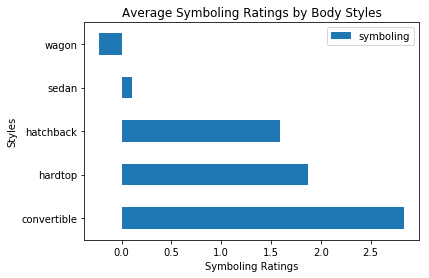

In [128]:
%matplotlib inline
# Calculate the average symboling ratings grouped by body styles, and then plot the result
data.groupby('body-style')['symboling'].mean().plot(kind='barh')
plt.title('Average Symboling Ratings by Body Styles')
plt.xlabel('Symboling Ratings')
plt.ylabel('Styles')
plt.legend()
plt.savefig('symbolingNbodystyle.png', bbox_inches = 'tight')
plt.show()
plt.close()

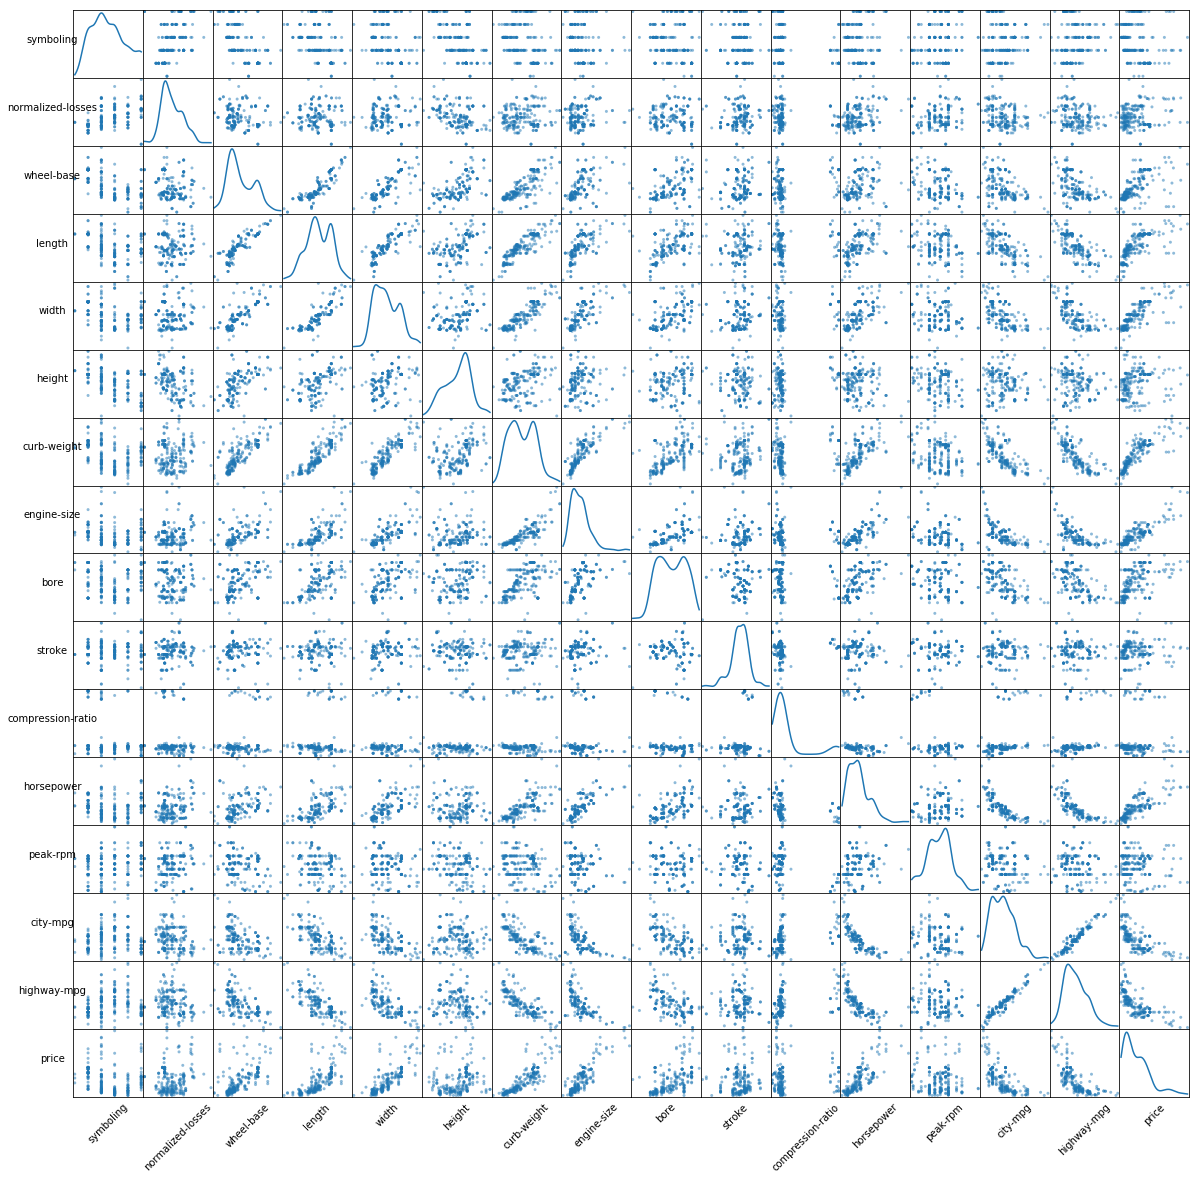

In [129]:
#Task 2: Data Exploration
#3. Scatter matrix for all numerical columns

#Code goes after this line
%matplotlib inline
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data._get_numeric_data(), figsize=(20,20), diagonal="kde")
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.savefig('scatter.png', bbox_inches = 'tight')
plt.show()
plt.close()
